In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
print(f'El dataset contiene {df.shape[0]} filas y {df.shape[1]} columnas.')

El dataset contiene 103904 filas y 25 columnas.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Eliminamos columnas que no vamos a usar

In [11]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Vereficamos si hay columnas con variables nulas

In [13]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [14]:
df['Arrival Delay in Minutes'].isnull().sum()

310

In [15]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(axis=0),inplace=True)

Exploratory Data Analytics (EDA)

In [16]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [17]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

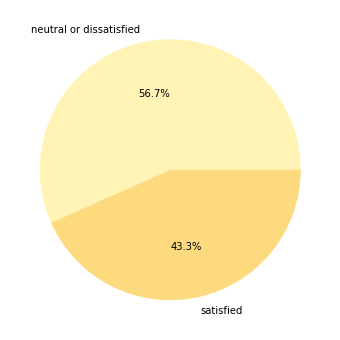

In [18]:
plt.figure(figsize=(6,6))
plt.pie(df['satisfaction'].value_counts(),labels=['neutral or dissatisfied','satisfied'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

En el grafico circular vemos como la selección esta más o menos equlibrada

<AxesSubplot:>

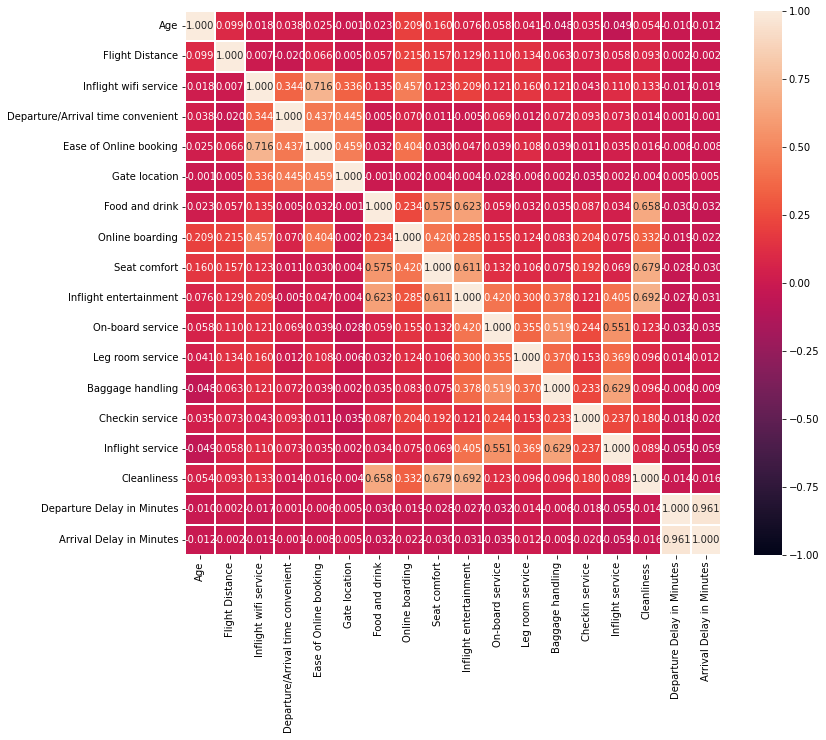

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.3f',linewidths=.2)

Vemos en el mapa de calor que existe una gran correlación entre las variables 'Departure Delay in Minutes' y 'Arrival Delay in Minutes'

C:\Users\ale_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


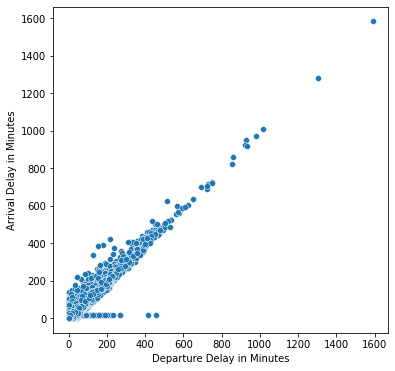

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'])
plt.show()

Vemos en el gráfico de puntos que las variables 'Arrival Delay in Minutes' y 'Departure Delay in Minutes' forman una casi linea perfecta entre ellas 

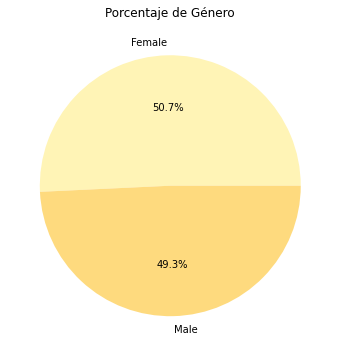

In [21]:
plt.figure(figsize=(6,6))
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.title('Porcentaje de Género')
plt.show()

En el gráfico vemos que casi son identicas el porcentaje de hombres como mujeres

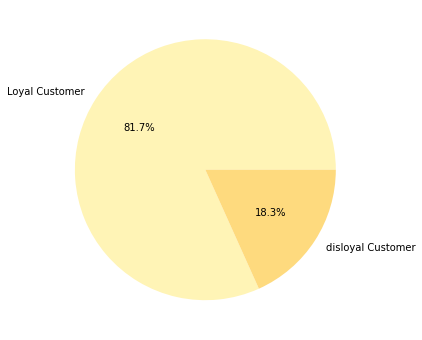

In [22]:
plt.figure(figsize=(6,6))
plt.pie(df['Customer Type'].value_counts(),labels=['Loyal Customer','disloyal Customer'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

El porcentaje de cliente regulares supera a la de los clientes irregulares

<AxesSubplot:xlabel='Age', ylabel='Count'>

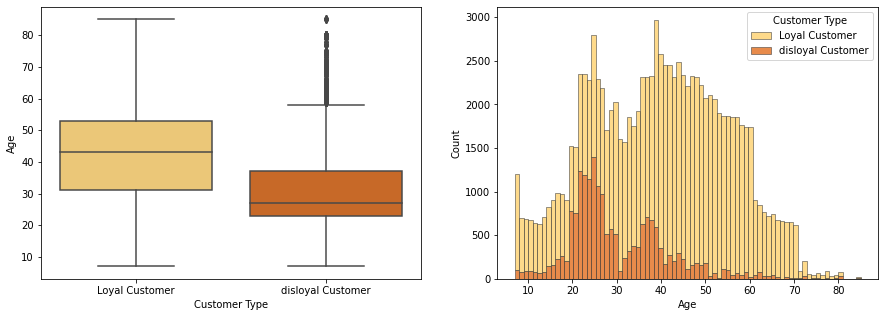

In [23]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x='Age', hue='Customer Type', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

Aquí vemos que en promedio los clientes regulares de la aerolínea en promedio están entre los de 30 a 50 años, mientras que las de los clientes irregulares en promedio estan entre 25 a 35 años.

<AxesSubplot:xlabel='Age', ylabel='Count'>

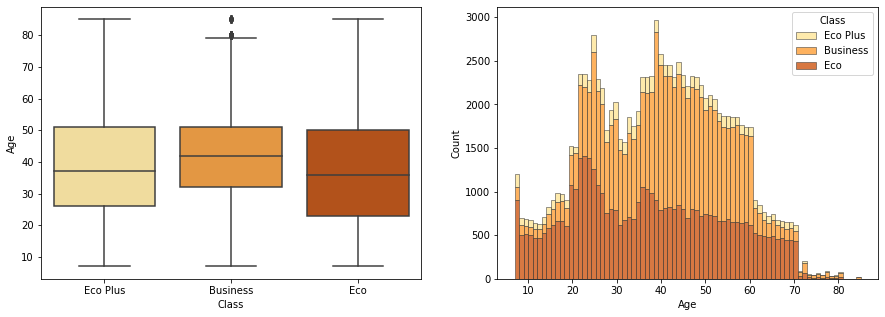

In [24]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x='Age', hue='Class', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

Acá podemos ver que la mayoria de los clientes regulares de la aerolínea compran en promedio pasajes de clase ejecutiva

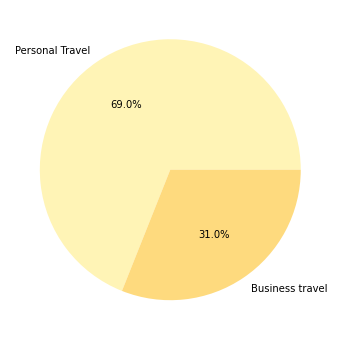

In [25]:
plt.figure(figsize=(6,6))
plt.pie(df['Type of Travel'].value_counts(),labels=['Personal Travel','Business travel'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

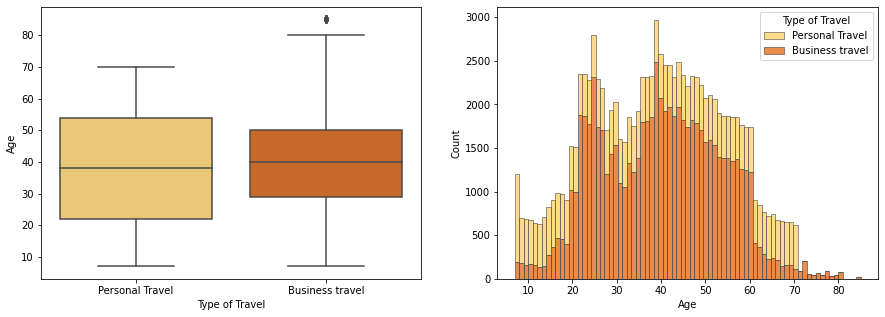

In [26]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Type of Travel", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x='Age', hue='Type of Travel', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

- El propósito en la mayorias de los casos, los pasajeros regulares de la aerolínea viajan mas por motivos personales que viajes de negocios.
- El promedio de los pasajeros por viajes personales es entre 22 a 55 años.
- Mientras que los pasajeros que viajan por negocios es entre 30 a 50 años.

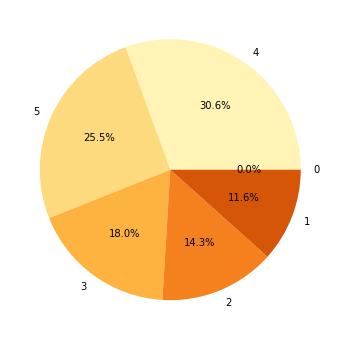

In [27]:
plt.figure(figsize=(6,6))
plt.pie(df['Seat comfort'].value_counts(),labels=['4','5','3','2','1','0'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

El porcentaje de los pasajeros es más del 50% que se sienten sastifecho con la comodidad de los asientos.

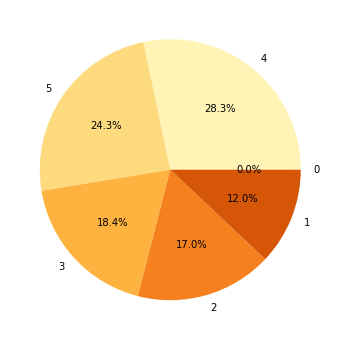

In [28]:
plt.figure(figsize=(6,6))
plt.pie(df['Inflight entertainment'].value_counts(),labels=['4','5','3','2','1','0'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

Podemos ver que le nivel de sastifacción de entrenimiento a bordo es mas del 50%

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

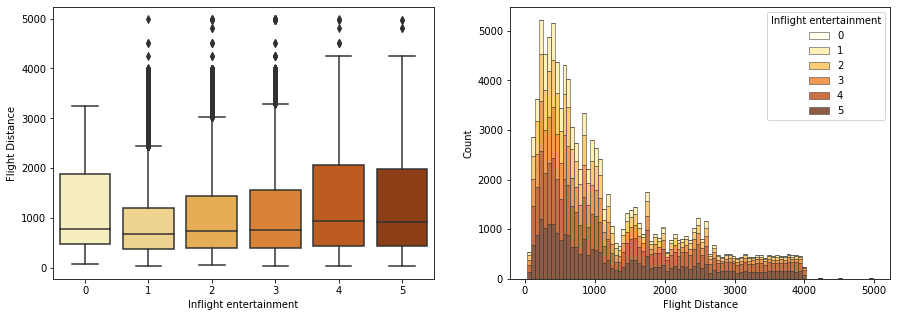

In [29]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x='Flight Distance', hue='Inflight entertainment', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

Se puede observar el siguiente patrón: cuanto más distancia viaja un pasajero de avión (respectivamente, cuanto más tiempo está en vuelo), más satisfecho está con el entretenimiento en vuelo

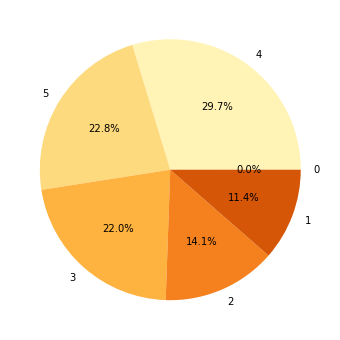

In [30]:
plt.figure(figsize=(6,6))
plt.pie(df['On-board service'].value_counts(),labels=['4','5','3','2','1','0'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

El servicio a bordo es considerado muy sastifactorio

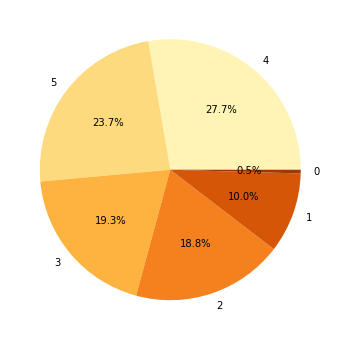

In [31]:
plt.figure(figsize=(6,6))
plt.pie(df['Leg room service'].value_counts(),labels=['4','5','3','2','1','0'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

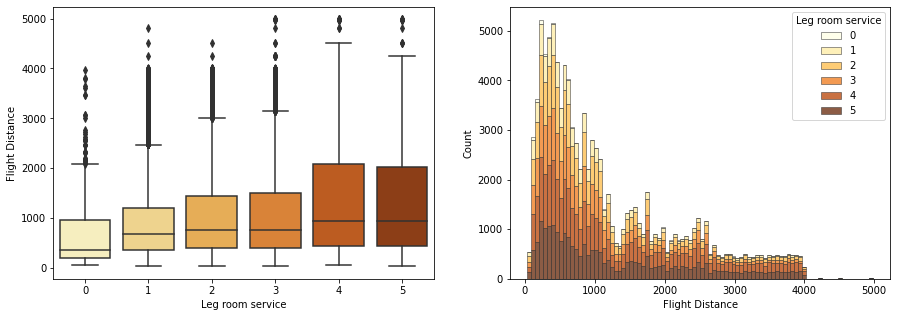

In [32]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x='Flight Distance', hue='Leg room service', palette='YlOrBr', multiple= 'stack' , 
edgecolor = '.2', linewidth = .5)

Se puede observar el siguiente patrón: cuanto más distancia viaja un pasajero de avión (respectivamente, cuanto más tiempo está en vuelo), más satisfecho está con el espacio adicional para las piernas (en promedio).

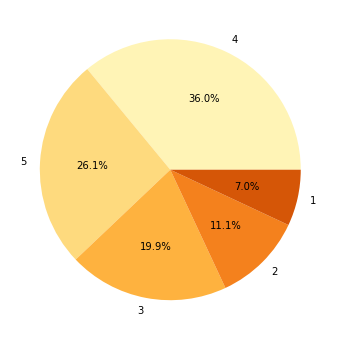

In [33]:
plt.figure(figsize=(6,6))
plt.pie(df['Baggage handling'].value_counts(),labels=['4','5','3','2','1'],
colors = sns.color_palette('YlOrBr'), autopct = '%1.1f%%')
plt.show()

Más del 60% de los pasajeros se mostraron satisfechos con el servicio de transporte de equipaje (puntuación de 4-5 sobre 5)

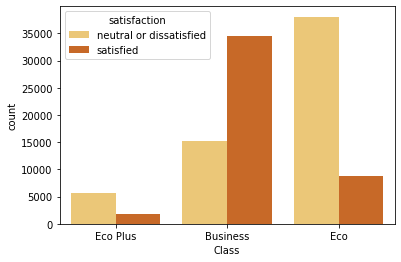

In [34]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

Este gráfico es muy revelador. Puede ver que la mayoría de los pasajeros que volaron en clase económica plus o clase económica no estaban satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva estaban satisfechos.

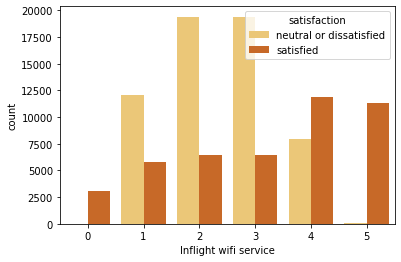

In [35]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

De acuerdo con este gráfico, puede ver que casi todos los pasajeros que calificaron el servicio wifi con 5 de 5 puntos estaban satisfechos con el vuelo.

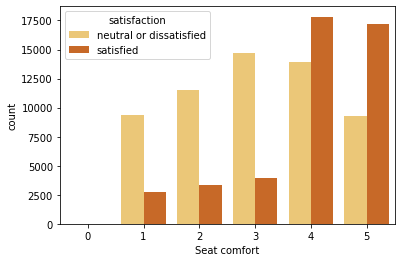

In [36]:
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

La mayoría de los pasajeros que calificaron la comodidad de los asientos con 4 y 5 puntos sobre 5.

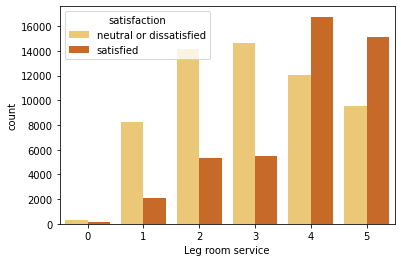

In [37]:
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

 La mayoria de los pasajeros clasificaron el espacio adicional para las piernas con 4 y 5 puntos sobre 5, estaban satisfechos con el vuelo.

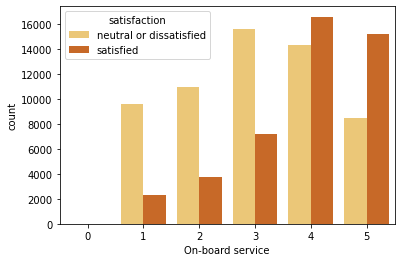

In [38]:
sns.countplot(x = 'On-board service', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

La mayoria de los pasajeros clasificaron el servicio a bordo con 4 y 5 puntos sobre 5.

In [39]:
lencoders = {}
for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [40]:
lencoders

{'Gender': LabelEncoder(),
 'Customer Type': LabelEncoder(),
 'Type of Travel': LabelEncoder(),
 'Class': LabelEncoder(),
 'satisfaction': LabelEncoder()}

In [41]:
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

Normalización de datos

In [42]:
sc = StandardScaler()
x = sc.fit_transform(X)

Separacion de datos

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (83123, 22), (83123,)
Shape of testing data : (20781, 22), (20781,)


Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)

In [46]:
print(lr_conf)

[[10636  1077]
 [ 1463  7605]]


In [47]:
lr_report = classification_report(y_test,lr_pred)

In [48]:
print(lr_report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.88     20781
weighted avg       0.88      0.88      0.88     20781



In [49]:
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


The Accuracy of Logistic Regression is 87.78 %


Gaussian NB

In [50]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

In [51]:
gnb_conf = confusion_matrix(y_test,gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")

Confusion Matrix : 

[[10546  1167]
 [ 1623  7445]]


In [52]:
gnb_report = classification_report(y_test, gnb_pred)
print(f"\nClassification Report : \n\n{gnb_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11713
           1       0.86      0.82      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [53]:
gnb_acc = round(accuracy_score(y_test,gnb_pred)*100,ndigits=2)
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")


The Accuracy of Gaussian Naive Bayes is 86.57 %


Random Forest 

In [54]:
rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)

In [55]:
rfg_conf = confusion_matrix(y_test, rfg_pred)
print(f"Confusion Matrix : \n\n{rfg_conf}")

Confusion Matrix : 

[[11488   225]
 [  566  8502]]


In [56]:
rfg_report = classification_report(y_test, rfg_pred)
print(f"\nClassification Report : \n\n{rfg_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [57]:
rfc_eval = cross_val_score(estimator = rfg, X = x_train, y = y_train, cv = 10)

In [58]:
rfc_eval

array([0.96006255, 0.96319018, 0.96222784, 0.95897498, 0.96029836,
       0.96186237, 0.96438884, 0.9607796 , 0.96198268, 0.96462945])

In [59]:
rfc_eval.mean()

0.9618396838237174

In [60]:
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")


The Accuracy of Random Forest Classifier is 96.19 %


Kneigbors Classifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [62]:
knn_conf = confusion_matrix(y_test, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")

Confusion Matrix : 

[[11480   233]
 [ 1585  7483]]


In [63]:
knn_report = classification_report(y_test, knn_pred)
print(f"Classification report : \n\n{knn_report}")

Classification report : 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     11713
           1       0.97      0.83      0.89      9068

    accuracy                           0.91     20781
   macro avg       0.92      0.90      0.91     20781
weighted avg       0.92      0.91      0.91     20781



In [64]:
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"\n The accuracy of Kneigbors Classifier is {knn_acc} %")


 The accuracy of Kneigbors Classifier is 91.25 %


Extreme Gradient Boosting Classifier

In [65]:
xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

C:\Users\ale_d\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [66]:
xgb_conf = confusion_matrix(y_test, xgb_pred)
print(f"Confusion Matrix : \n\n{xgb_conf}")

Confusion Matrix : 

[[11451   262]
 [  523  8545]]


In [67]:
xgb_report = classification_report(y_test, xgb_pred)
print(f"\nClassification Report : \n\n{xgb_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [68]:
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")


The Accuracy of Extreme Gradient Boosting Classifier is 96.22 %


Stochastic Gradient Descent

In [69]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [70]:
sgd_conf = confusion_matrix(y_test, xgb_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")

Confusion Matrix : 

[[11451   262]
 [  523  8545]]


In [71]:
sgd_report = classification_report(y_test, xgb_pred)
print(f"\nClassification Report : \n\n{sgd_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [77]:
sgd_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Stochastic Gradient Descent is {sgd_acc} %")


The Accuracy of Stochastic Gradient Descent is 96.22 %


Support Vector Machine

In [73]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

In [74]:
svc_conf = confusion_matrix(y_test, xgb_pred)
print(f"Confusion Matrix : \n\n{svc_conf}")

Confusion Matrix : 

[[11451   262]
 [  523  8545]]


In [75]:
svc_report = classification_report(y_test, xgb_pred)
print(f"\nClassification Report : \n\n{svc_report}")


Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [76]:
svc_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"\nThe Accuracy of Support Vector Machine is {svc_acc} %")


The Accuracy of Support Vector Machine is 96.22 %


Conclusión

Los clasificadores que mostraron mejores resultados fueron Gradient Boosting Classifier, Stochastic Gradient Descent y Support Vector Machine.